# Import Libraries & Load Data


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=sns.load_dataset('titanic')
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Result : A 'titanic' dataset is taken for analysis which contains 891 rows and 15 colums

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Result : First 5 rows of dataset is shown. 

In [4]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


Result : Last 5 rows of dataset is shown. 

# Data Overview and Missing Value



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Result : Gives information about the dataset.

In [6]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


According to the dataset :

1. 38.3% people survived
2. More number of people were actually in 3rd class
3. 50% of passengers were in between the age of 20 to 38.

Since the survival rate is 0.38, even if I decide to give a submission of all passengers being perished, I would still be having a accuracy of 62%. So accuracy cannot be considered as the only measure in saying how good the model is.

In [7]:
df.groupby('pclass')['pclass'].count()

pclass
1    216
2    184
3    491
Name: pclass, dtype: int64

Result : Number of passengers travelled in class 3 is higher than other two class.

In [8]:
df.groupby('sex')['sex'].count()

sex
female    314
male      577
Name: sex, dtype: int64

Conclusion : Number of Male passengers is greater than female passengers.

In [9]:
df.pivot_table('survived','sex','pclass',aggfunc=np.sum,margins=True)

C:\Users\ks816\AppData\Local\Temp\ipykernel_13168\696689003.py:1: FutureWarning: The provided callable <function sum at 0x00000220F30F3CE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table('survived','sex','pclass',aggfunc=np.sum,margins=True)
C:\Users\ks816\AppData\Local\Temp\ipykernel_13168\696689003.py:1: FutureWarning: The provided callable <function sum at 0x00000220F30F3CE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.pivot_table('survived','sex','pclass',aggfunc=np.sum,margins=True)
C:\Users\ks816\AppData\Local\Temp\ipykernel_13168\696689003.py:1: FutureWarning: The provided callable <function sum at 0x00000220F30F3CE0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided calla

pclass,1,2,3,All
sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


Result : Number of Female passengers survived is more than Male passenger survived within the each class and overall also.

In [10]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Result : Column 'age' , 'embarked' , 'deck' and 'embark_town' contains null values.

# Handling Missing Values

In [11]:
df['age'].median()

np.float64(28.0)

Result : The median age of all the passengers travelling was 28 years.

In [12]:
df['age'].fillna(df['age'].median(),inplace=True)
df

C:\Users\ks816\AppData\Local\Temp\ipykernel_13168\4156218647.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Result : Missing value of 'age' column is inplaced by 28.0 (median value of age column).

In [13]:
df['embarked'].mode()[0]

'S'

In [14]:
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df

C:\Users\ks816\AppData\Local\Temp\ipykernel_13168\4171182430.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


Result : Missing value of 'embarked' column is inplaced by S (mode of embarkedd column).

In [15]:
df.drop(columns=['deck'], inplace=True)
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


Result : 'deck' column has 688 null values that makes it irrelevant so we drop 'deck' column

In [16]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

# Check And Remove Duplicates

In [17]:
print("Duplicates:",df.duplicated().sum())

Duplicates: 116


Reault : There are 116 duplicate rows in our dataset.

In [18]:
df[df.duplicated()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
47,1,3,female,28.0,0,0,7.7500,Q,Third,woman,False,Queenstown,yes,True
55,1,1,male,28.0,0,0,35.5000,S,First,man,True,Southampton,yes,True
76,0,3,male,28.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
77,0,3,male,28.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
87,0,3,male,28.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,0,3,male,26.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
878,0,3,male,28.0,0,0,7.8958,S,Third,man,True,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,Southampton,no,True


In [19]:
df.drop_duplicates(inplace=True)
print("Duplicates:",df.duplicated().sum())

Duplicates: 0


Result : All the duplicate rows were dropped that means now there is no duplicate is in our dataset. 

# Handling Outliers

An Outliers is a data point that significantly deviates from other observations in a dataset.

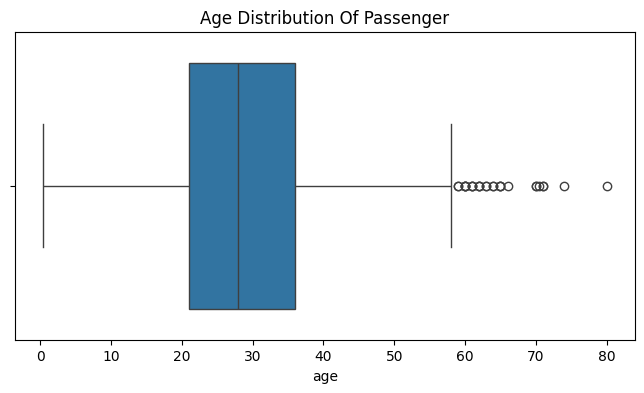

In [20]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['age'])
plt.title('Age Distribution Of Passenger')
plt.show()

Resul : A boxplot is created for 'age' column. Outliers are represented by small circles.

In [21]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
print(Q1,Q3)
IQR = Q3 - Q1
print(IQR)

21.0 36.0
15.0


Result : It gives value of inter quantile range (IQR) .

In [22]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print(lower_limit,upper_limit)

-1.5 58.5


Result : It gives value of lower limit and upper limit .

In [23]:
df = df[(df['age'] >= lower_limit) & (df['age'] < upper_limit-2)]
df


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


Result : This is used to remove outlier .

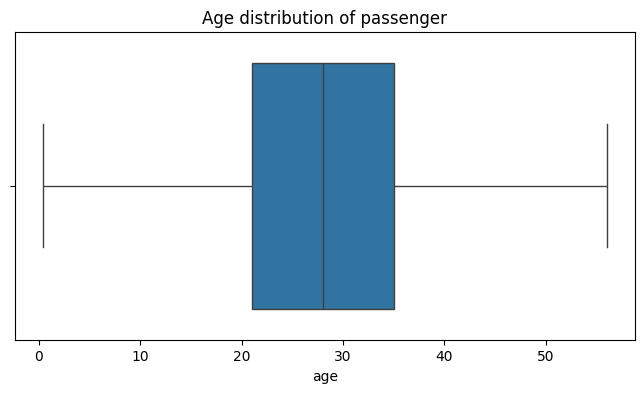

In [24]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['age'])
plt.title('Age distribution of passenger')
plt.show()

Result : Now we can clearly see that there is no outliers.  

# Visualization

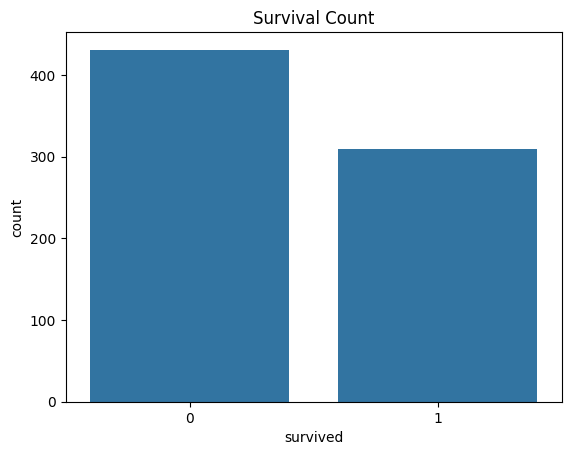

In [25]:
sns.countplot(x='survived', data=df)
plt.title("Survival Count")
plt.show()

Countplot for 'survived' column is created where 0 represnts passenger not survived and 1 represents passenger survived .

Result : On Analysing this plot we can say that no of passengers survived is less than not survived.

In [26]:
df.groupby(['survived','sex'])['survived'].count()

survived  sex   
0         female     75
          male      356
1         female    209
          male      101
Name: survived, dtype: int64

Result : Number of female passenger survived is more than the number of number of male passenger survied.

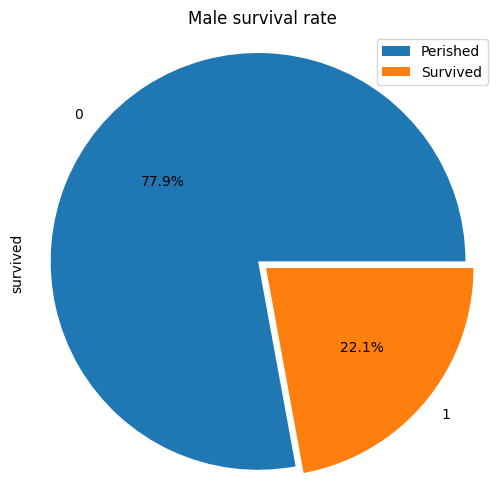

In [27]:
df[df['sex'] == 'male'].survived.groupby(df.survived).count().plot(kind='pie', figsize=(6, 6),explode=[0,0.05],autopct='%1.1f%%')
plt.axis('equal')
plt.legend(["Perished","Survived"])
plt.title("Male survival rate")
plt.show()

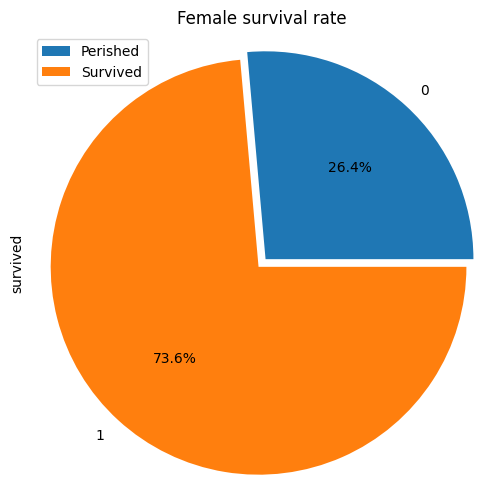

In [28]:
df[df['sex'] == 'female'].survived.groupby(df.survived).count().plot(kind='pie',autopct='%1.1f%%',figsize=(6, 6),explode=[0,0.05])
plt.axis('equal')
plt.title("Female survival rate")
plt.legend(["Perished","Survived"])
plt.show()

On Analyse Of : The above 2 plots says the females were given more priority than male in the survival process. That too there is a significant difference between the two.

So now if we choose just Sex as the only feature and say all females survived and all men perished, then we would end up with an accuracy of 78.67%

In [29]:
pd.crosstab([df.sex, df.survived], [df.sibsp, df.pclass], margins=True)

sibsp              0            1          2         3          4  5  8  All
pclass             1   2    3   1   2   3  1  2   3  1  2   3   3  3  3     
sex    survived                                                             
female 0           1   2   32   2   3  21  0  0   3  0  0   5   4  1  1   75
       1          43  38   39  36  24  14  3  3   3  2  1   1   2  0  0  209
male   0          45  48  165  14  18  33  1  4   7  1  0   4  11  4  1  356
       1          26   8   33  14   7   9  1  1   1  0  0   0   1  0  0  101
All              115  96  269  66  52  77  5  8  14  3  1  10  18  5  2  741

The above crosstable indicate two things :
1. Most of the passenger didn't had sibling onboard abd majority had atmost 1 sibling onboard .
2. Not much of priority was given to the passenger who had siblings onboard in the rescue process .

In [30]:
pd.crosstab([df.sex, df.survived], [df.parch, df.pclass], margins=True)

parch              0             1           2          3     4  5  6  All
pclass             1    2    3   1   2   3   1   2   3  2  3  3  3  3     
sex    survived                                                           
female 0           1    4   34   0   1  11   2   0  15  0  1  2  3  1   75
       1          57   36   38  16  17  11  11  11   8  2  1  0  1  0  209
male   0          51   61  188   8   6  22   2   3  12  0  1  1  1  0  356
       1          33    7   34   3   7   7   5   2   3  0  0  0  0  0  101
All              142  108  294  27  31  51  20  16  38  2  3  3  5  1  741

The above crosstable indicate two things :
1. Most of the passenger didn't had parent onboard abd majority had atmost 1 parent onboard .
2. Not much of priority was given to the passenger who had parent onboard in the rescue process .

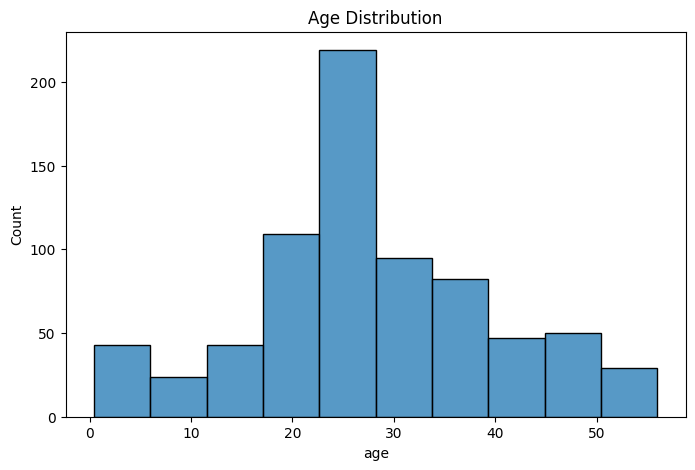

In [31]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=10)
plt.title("Age Distribution")
plt.show()


Description: These histograms illustrate the distribution of 'passengers’ ages. They help us to understand the age demographics on board.

Conclusion: A significant portion of the passengers were young adults, with fewer children and elderly individuals. This suggests that the Titanic had a diverse age range, but most travelers were in their 20s and 30s.

In [32]:
df['Family_size'] = df['sibsp'] + df['parch'] + 1

C:\Users\ks816\AppData\Local\Temp\ipykernel_13168\917849880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Family_size'] = df['sibsp'] + df['parch'] + 1


Result : It Create a new column 'family_size'

In [33]:
df['is_child'] = np.where(df['age'] < 16, 1, 0)

C:\Users\ks816\AppData\Local\Temp\ipykernel_13168\2695842681.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_child'] = np.where(df['age'] < 16, 1, 0)


Result : It Create a new column 'is_child' (1 if age < 16, else 0)

In [34]:
mean_survival = df.groupby(df['Family_size'])['survived'].mean()
mean_survival

Family_size
1     0.342233
2     0.546667
3     0.587629
4     0.714286
5     0.230769
6     0.142857
7     0.333333
8     0.000000
11    0.000000
Name: survived, dtype: float64

Result : It gives mean survival rate according to the family size .

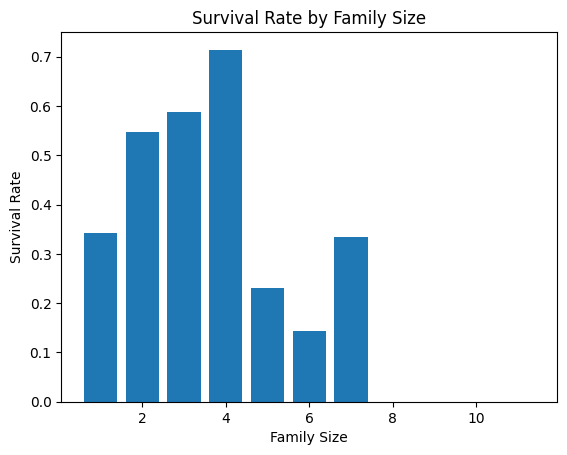

In [35]:
mean_survival = df.groupby(df['Family_size'])['survived'].mean()
plt.bar(mean_survival.index, mean_survival.values)
plt.xlabel("Family Size")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Family Size")
plt.show()

Description : This graph illustrates the relationship between family size (combining siblings/spouses and parents/children aboard) and survival rate.

Conclusion:
Passengers with small to medium family sizes (2-4 members) had a higher survival rate compared to those traveling alone or with very large families.

Large families (5+ members) had the lowest survival rate, possibly because coordinating a large group during an emergency was challenging.

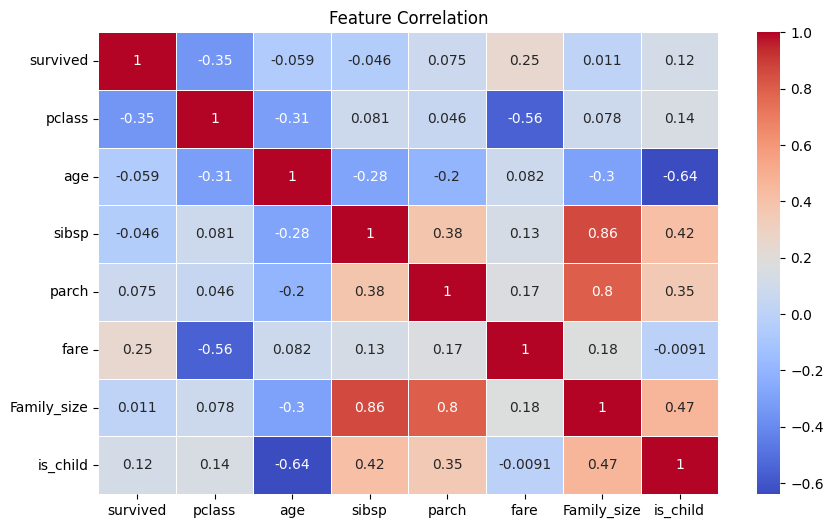

In [36]:
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation")
plt.show()

   On Analysis Of this Corelation table we can conclude some relation are as follows : 

1. Fare and Passenger Class are strongly correlated (negative correlation) because lower class tickets (in numeric) had higher fares.

2. Fare and Survival show a moderate positive correlation, indicating that higher fare-paying passengers had better survival rates, supporting the idea that first-class passengers were more likely to survive.

3. Age and SibSp/Parch show a weak correlation, suggesting that family size had little impact on age distribution.

4. Survival and SibSp/Parch have a weak correlation, meaning family size alone was not a strong determinant of survival but could have had some influence .

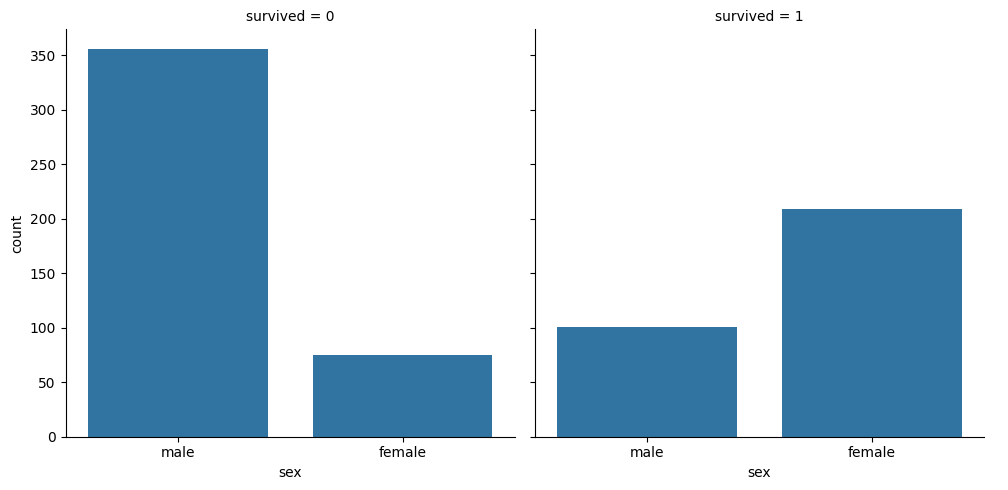

In [37]:
sns.catplot(x='sex', col='survived', kind='count', data=df);

Result : Number of female passenger survived is more than the number of number of male passenger survied.

<Axes: xlabel='pclass', ylabel='survived'>

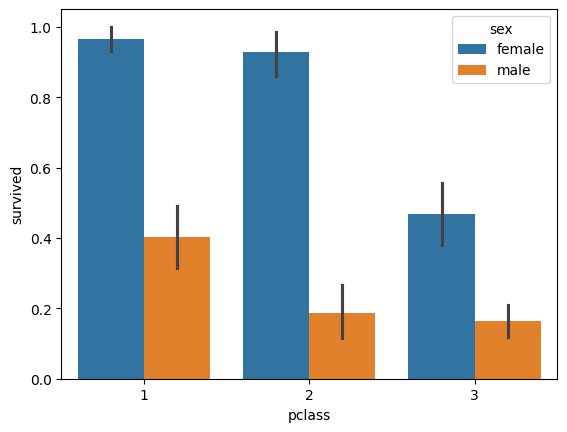

In [38]:
sns.barplot(x='pclass', y='survived', hue='sex', data=df)

Result : Number of female passenger survived is re than number of male passenger survived within each class.

It means priority was given to survive female passenger in rescue operation .

## Conclusion:

The analysis of the Titanic dataset reveals several key patterns about survival. It shows that certain factors significantly influenced a passenger's chances of survival. People who paid higher fares had a better chance of survival, while those with larger families faced more difficulties. Age also played a role, with younger passengers generally having better survival rates. Additionally, gender was a crucial factor, as women had a much higher likelihood of survival compared to men.

Through this study, we see how different aspects, such as financial status, family connections, and demographic details, impacted survival. This highlights the importance of data analysis in understanding real-world events and uncovering meaningful insights.